# Assignment 1/B
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.20 ==> 5
  * 2020.10.21 - 2020.10.27 ==> 4
  * 2020.10.28 - 2020.11.03 ==> 3
  * 2020.11.04 - 2020.11.10 ==> 2
  * 2020.11.11 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`.

### Description
In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images. To implement such kind of models, you should take a look at the following classes and methods: `Sequential model, Funcitonal API, MaxPooling2D, Conv2DTranspose`.


## Prepare dataset

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [ ]:
# Simpsons characters
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3487      0 --:--:-- --:--:-- --:--:--  3487
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1104M    0 1104M    0     0  86.2M      0 --:--:--  0:00:12 --:--:-- 75.9M


In [ ]:
!unzip simpsons_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

In [ ]:
# Flowers Recgonition
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3487      0 --:--:-- --:--:-- --:--:--  3457
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  224M    0  224M    0     0  92.6M      0 --:--:--  0:00:02 --:--:-- 99.1M


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

# New section

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas
import skimage
import sklearn
import os
import glob
from skimage.io import imsave
from skimage.transform import resize
import keras

##Working with Homer Simpson Images


In [ ]:
homer_simpson_images = "/content/simpsons_dataset/homer_simpson"

##Resizing  And normalizing Homer Simpson Images

In [ ]:
homer_data = []
homer_label = []
for i in os.listdir(homer_simpson_images):
    img = cv2.imread(os.path.join(homer_simpson_images, i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels -= 0.5
    pixels *= 2
    img = resize(pixels, (64,64))
    homer_data.append(img)
    homer_label.append(1)
    imsave(os.path.join(homer_simpson_images,i), img)

In [ ]:
path = os.path.join(homer_simpson_images, np.random.choice(os.listdir(homer_simpson_images)))
img = plt.imread(path)

##Working with The Flowers  Images


In [ ]:
flower = "/content/flowers"

##Resizing And normalizing The Flowers Images

In [ ]:
flower_data = []
flower_label =[]
for i in os.listdir(flower):
  path = os.path.join(flower, i)
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path, j))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels -= 0.5
    pixels *= 2
    img = resize(pixels, (64,64))
    flower_data.append(img)
    flower_label.append(i)
    imsave(os.path.join(path, j), img)

error: ignored

##Splitting the Data Set

In [ ]:
from sklearn.model_selection import train_test_split

homer_data = np.array(homer_data)
homer_label = np.array(homer_label)
flower_data = np.array(flower_data)
flower_label = np.array(flower_label)

train_data, test_data, train_label, test_label = train_test_split(homer_data, homer_label, test_size=0.2)

## printing shapes f training and testing data

In [ ]:
print('Training set size:', np.shape(train_data))
print('Training labels size:', np.shape(train_label))
print('Test set size:', np.shape(test_data))
print('Test labels size:',np.shape(test_label))

Training set size: (1796, 64, 64, 3)
Training labels size: (1796,)
Test set size: (450, 64, 64, 3)
Test labels size: (450,)


## Splitiing the training into training and validation sets

In [ ]:
train_data, valid_data, train_label, valid_label = train_test_split(train_data, train_label, test_size=0.25)

## Printing sizes and shapes of training and validation sets

In [ ]:
print('Shape of the training set', np.shape(train_data))
print('Shape of the testing set:', np.shape(test_data))
print('Shape of the validation set', np.shape(valid_data))

Shape of the training set (1347, 64, 64, 3)
Shape of the testing set: (450, 64, 64, 3)
Shape of the validation set (449, 64, 64, 3)


## Plotting five random images from the training set

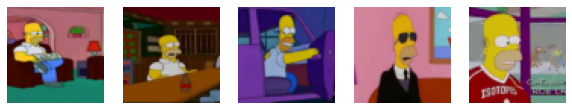

In [ ]:
selected = np.random.choice(len(train_data), 5)

plt.figure(figsize=(10., 10.))
for i, ind in enumerate(selected):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_data[ind]/2+0.5)
  plt.axis('off')

## Plotting five random images from the flowers dataset

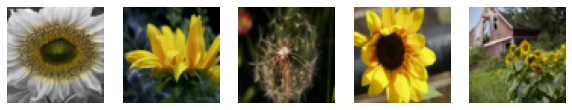

In [ ]:

selected = np.random.choice(len(flower_data), 5)

plt.figure(figsize=(10., 10.))
for i, ind in enumerate(selected):
  plt.subplot(1, 5, i+1)
  plt.imshow(flower_data[ind]/2+0.5)
  plt.axis('off')

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

## Augment the training set using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen_args = dict(featurewise_center=False, 
featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1,
height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)

seed=0
batch_size=128

datagen = ImageDataGenerator(**data_gen_args)

## definning tow contructors for the image data generatot and then zipping them

In [ ]:
image_generator = datagen.flow(
        train_data,
        batch_size=batch_size,
        seed=seed)

label_generator = datagen.flow(
        train_data,
        batch_size=batch_size,
        seed=seed)

train_generator = zip(image_generator,label_generator)

## To validate that the augmentation is working, plotting 5 original images with their corresponding transformed (augmented) images.

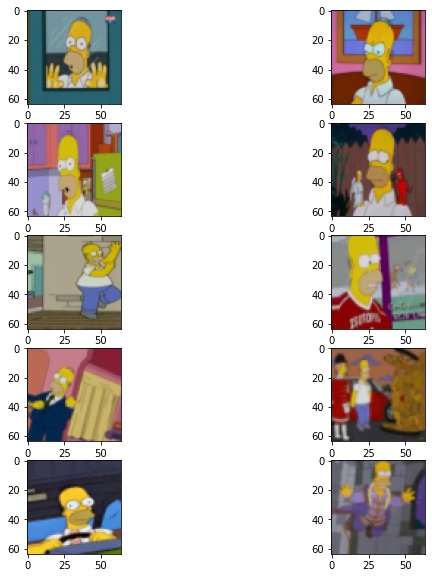

In [ ]:
pairs = next(train_generator)
plt.figure(figsize = (10, 10))
for i in range(5):
    plt.subplot(5, 2, i + 1)
    plt.imshow(train_data[i] / 2 + 0.5)
    plt.subplot(5, 2, i + 6)
    plt.imshow(pairs[1][i] / 2 + 0.5)

## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

##definning the model 

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu',input_shape=(64, 64, 3), padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Reshape(target_shape=(256,64)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Reshape(target_shape=(16, 16, 256)))
model.add(Conv2DTranspose(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=3,kernel_size=(3, 3), activation='relu', padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

## First definning the Adam optimizor , the loss and the metrics

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(1e-4), loss = "mae", metrics = "mse")

## Training the model on the augmented data for 200 epochs without early stopping.

In [ ]:
history = model.fit(train_generator, steps_per_epoch = round(train_data.shape[0] / 128), epochs = 200,
    verbose = 1, validation_data = (valid_data, valid_data), validation_batch_size = 128)

Epoch 1/200
 2/11 [====>.........................] - ETA: 0s - loss: 0.4209 - mse: 0.2511WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0425s vs `on_train_batch_end` time: 0.0732s). Check your callbacks.


11/11 [==============================] - 3s 305ms/step - loss: 0.4193 - mse: 0.2494 - val_loss: 0.4152 - val_mse: 0.2469
Epoch 2/200
11/11 [==============================] - 3s 267ms/step - loss: 0.4156 - mse: 0.2459 - val_loss: 0.4100 - val_mse: 0.2418
Epoch 3/200
11/11 [==============================] - 3s 268ms/step - loss: 0.3997 - mse: 0.2342 - val_loss: 0.3926 - val_mse: 0.2341
Epoch 4/200
11/11 [==============================] - 3s 265ms/step - loss: 0.3861 - mse: 0.2258 - val_loss: 0.3833 - val_mse: 0.2257
Epoch 5/200
11/11 [==============================] - 3s 264ms/step - loss: 0.3760 - mse: 0.2180 - val_loss: 0.3753 - val_mse: 0.2196
Epoch 6/200
11/11 [==============================] - 3s 268ms/step - loss: 0.3708 - mse: 0.2159 - val_loss: 0.3692 - val_mse: 0.2168
Epoch 7/200
11/11 [==============================] - 3s 266ms/step - loss: 0.3670 - mse: 0.2154 - val_loss: 0.3664 - val_mse: 0.2147
Epoch 8/200
11/11 [==============================] - 3s 266ms/step - loss: 0.3639

## Plotting  the training curve (train/validation loss and mse).

Classification threshold: 0.3223601204598608


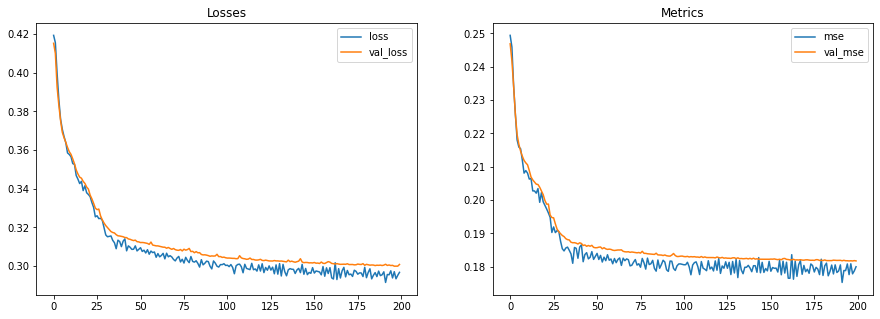

In [ ]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title("Losses")
plt.plot(np.arange(200), history.history["loss"], np.arange(200), history.history["val_loss"])
plt.legend(labels = ("loss", "val_loss"))

plt.subplot(1, 2, 2)
plt.title("Metrics")
plt.plot(np.arange(200), history.history["mse"], np.arange(200), history.history["val_mse"])
plt.legend(labels = ("mse", "val_mse"))

a = np.array(history.history["val_loss"])
th = np.mean(a) + 0.5 * np.std(a)
print(f"Classification threshold: {th}")

## Evaluate the trained model on the test set.

In [ ]:
test_data = np.asarray(test_data)
test_label = np.asarray(test_label)
results = model.evaluate( x = test_data, y = test_data, batch_size = batch_size, verbose = 1)
print(f"Loss: {results[0]}, Mse: {results[1]}\n")

4/4 [==============================] - 0s 74ms/step - loss: 0.3134 - mse: 0.1911
Loss: 0.31337857246398926, Mse: 0.1911412924528122



In [ ]:
def predict_and_scale(array):
    pred = model.predict(array, batch_size = batch_size, verbose = 1)
    corr = np.copy(pred)
    for i in range(corr.shape[0]):
        corr[i] /= 255
        corr[i] -= 0.5
        corr[i] *= 2
    return pred, corr

pred, corr = predict_and_scale(test_data)

1/4 [======>.......................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0165s vs `on_predict_batch_end` time: 0.0316s). Check your callbacks.


4/4 [==============================] - 0s 38ms/step


## Plotting some (5) reconstruction examples. (Input and prediction pairs.)

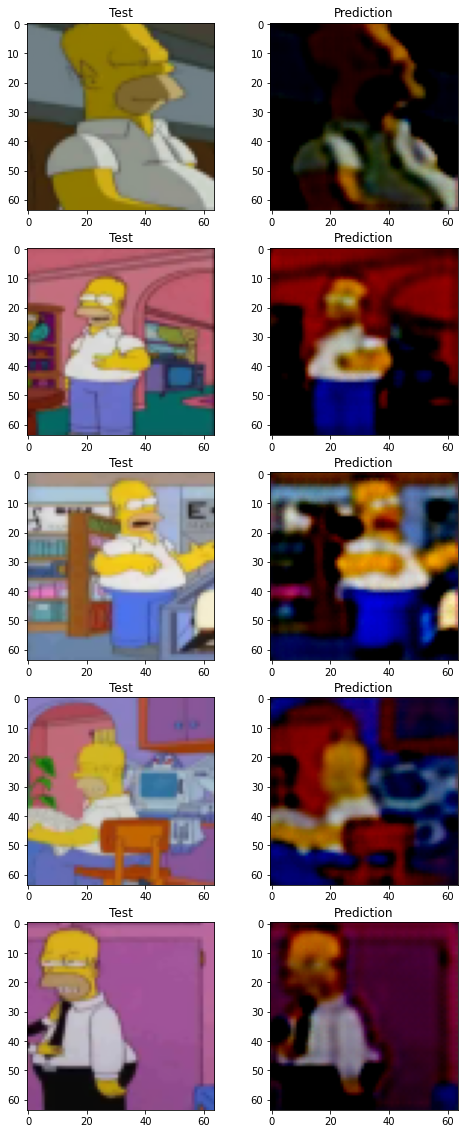

In [ ]:
R = np.random.randint(test_data.shape[0], size = 5)
plt.figure(figsize = (8, 20))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.title("Test")
    plt.imshow(test_data[R[i]] / 2 + 0.5)
    plt.subplot(5, 2, 2 * i + 2)
    plt.title("Prediction")
    plt.imshow(pred[R[i]])

## Calculatting the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: <thrs> = <mean> + 0.5*<std>

In [ ]:
ratio = 0
for i in range(test_data.shape[0]):
    if np.mean(np.abs(test_data[i] - pred[i])) < th:
        ratio += 1
ratio /= test_data.shape[0]
print(f"Recognized {np.round(ratio * 100, 2)}% of the images.")

Recognized 60.89% of the images.


In [ ]:
results2 = model.evaluate( x = flower_data, y = flower_data, batch_size = batch_size, verbose = 1)
print(f"Loss: {results2[0]}, Mse: {results2[1]}\n")

8/8 [==============================] - 0s 57ms/step - loss: 0.3803 - mse: 0.2574
Loss: 0.38030490279197693, Mse: 0.25744789838790894



In [ ]:
pred2, corr2 = predict_and_scale(flower_data)
ratio2 = 0
for i in range(flower_data.shape[0]):
    if np.mean(np.abs(flower_data[i] - pred2[i])) < th:
        ratio2 += 1
ratio2 /= flower_data.shape[0]
print(f"Recognized {np.round(ratio2 * 100, 2)}% of the images.")

2/8 [======>.......................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0171s vs `on_predict_batch_end` time: 0.0382s). Check your callbacks.


8/8 [==============================] - 0s 50ms/step
Recognized 35.63% of the images.


##  evaluate the classification performance on the Flowers dataset.

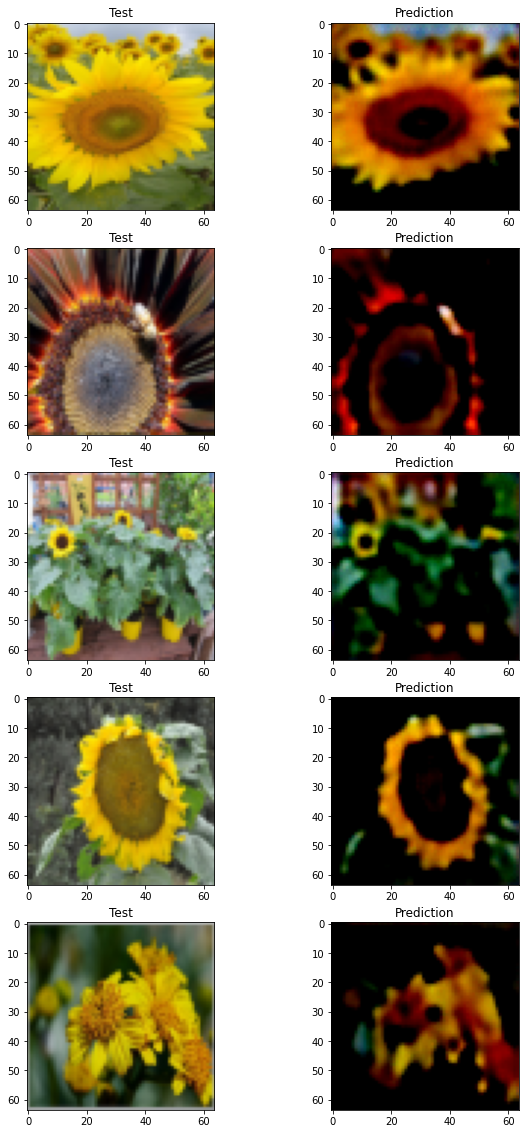

In [ ]:
R = np.random.randint(flower_data.shape[0], size = 5)
plt.figure(figsize = (10, 20))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.title("Test")
    plt.imshow(flower_data[R[i]] / 2 + 0.5)
    plt.subplot(5, 2, 2 * i + 2)
    plt.title("Prediction")
    plt.imshow(pred2[R[i]])